In [ ]:
#在鐵達尼資料集中， 透過進階補值方法 KNN，
#將鐵達尼號中的 Titanic_train .csv 中的 age 的遺失值進行補值。

#step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
#step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

In [4]:
df_train=pd.read_csv("Titanic_train.csv")

In [6]:
display(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


In [8]:
#Age, Cabin, Embarked 有遺失值

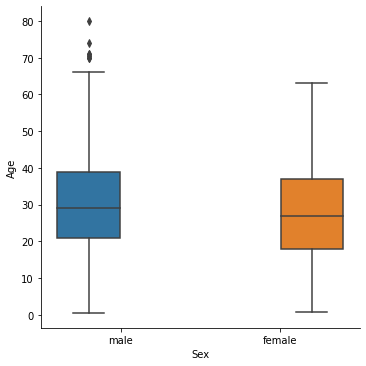

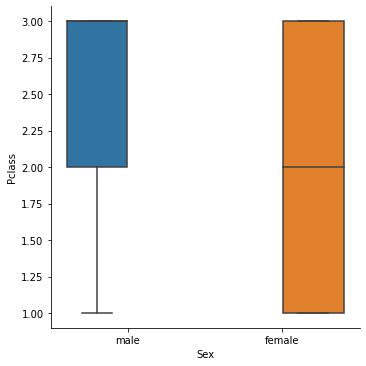

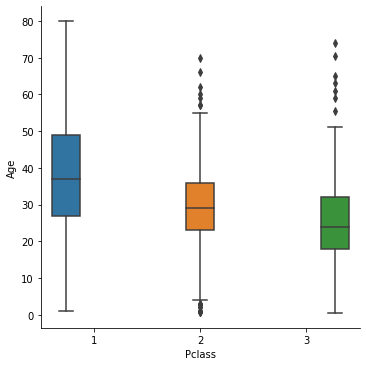

In [13]:
#觀察 Age 和 Pclass 與 Sex 是否有關連性?
g1 = sns.catplot(x="Sex", y="Age", hue="Sex",
               data=df_train,kind="box")
g2 = sns.catplot(x="Sex", y="Pclass", hue="Sex",
               data=df_train,kind="box")
g3 = sns.catplot(x="Pclass", y="Age", hue="Pclass",
               data=df_train,kind="box")

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

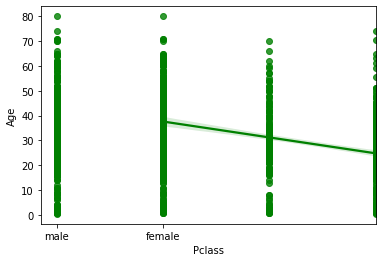

In [15]:
g4 = sns.regplot(x="Pclass", y="Age", color="g",data=df_train)
g5 = sns.regplot(x="Sex", y="Age", color="g",data=df_train)
g6 = sns.regplot(x="Pclass", y="Sex", color="g",data=df_train)
#年齡和身高有關連
#年齡和身高有關連

In [ ]:
#Sex and Age 無特別相關 ;  Sex and Pclass 可能相關 ;  Age and Pclass 相關

In [ ]:
#step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。

In [18]:
#使用Pclass補Age遺失值
ori_data=pd.DataFrame(df_train)

In [19]:
#複製一份資料給 data
data=ori_data.copy() 

In [20]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:

#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態
#轉型 
#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
display(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [26]:
from sklearn.metrics.pairwise import nan_euclidean_distances


In [34]:
new= data.drop(["Name","Ticket","Cabin","Embarked"], axis=1)

In [35]:
new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,NaN,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [36]:
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(new)))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,66.055004,4.843101,47.814459,13.661625,5.602039,55.274543,25.399422,10.539451,25.860953,...,881.069473,882.007183,883.027498,884.005679,885.448765,886.033895,887.300717,949.472900,889.303414,890.056880
1,66.055004,0.000000,64.531188,18.537324,63.430673,67.358153,25.713177,62.160063,61.619985,48.368070,...,882.298121,883.241518,884.150784,885.432616,885.022781,886.987566,887.165323,949.626107,889.041231,891.291468
2,4.843101,64.531188,0.000000,46.127873,9.328217,3.591165,52.311604,28.034309,7.161926,26.180841,...,879.029010,880.013475,881.007736,882.002135,883.364840,884.016830,885.305205,947.322860,887.277468,888.021413
3,47.814459,18.537324,46.127873,0.000000,45.138703,47.855513,19.352814,46.277431,43.118487,31.754434,...,879.169164,880.130296,881.060588,882.263341,882.352424,883.948534,884.447065,946.641053,886.347906,888.167564
4,13.661625,63.430673,9.328217,45.138703,0.000000,1.154721,47.838637,35.744239,9.772755,30.901709,...,877.002294,878.100270,879.031855,880.057384,881.275868,882.050737,883.421079,945.182770,885.320734,886.005130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886.033895,886.987566,884.016830,883.948534,882.050737,941.841738,881.271975,879.398775,878.005971,877.264163,...,9.383648,7.011903,4.031129,6.663520,20.784986,0.000000,18.894444,11.720678,17.349352,8.340414
887,887.300717,887.165323,885.305205,884.447065,883.421079,943.182482,881.967102,880.218527,879.243398,878.015379,...,26.955438,20.459692,21.914607,24.035443,20.851034,18.894444,0.000000,7.848749,7.348469,26.058828
888,949.472900,949.626107,947.322860,946.641053,945.182770,944.106381,943.392825,941.835679,940.852927,939.720831,...,18.421513,15.427999,15.107330,18.235288,7.649883,11.720678,7.848749,0.000000,7.921219,17.121081
889,889.303414,889.041231,887.277468,886.347906,885.320734,945.319323,883.714869,882.380108,881.207667,880.083522,...,24.629163,21.227317,20.548723,23.615726,14.722963,17.349352,7.348469,7.921219,0.000000,23.174609


In [37]:
#Step3: 透過 KNN 進行補值
# KNN
# 設定 k 值
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(new))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled)

,0,1,2,3,4,5,6,7
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,1.0,27.0,0.0,0.0,13.0000
887,888.0,1.0,1.0,0.0,19.0,0.0,0.0,30.0000
888,889.0,0.0,3.0,0.0,39.0,1.0,2.0,23.4500
889,890.0,1.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [39]:
#判斷補值的好壞?

In [40]:
#可以運用模型預測準確度的指標，來判斷補值的好壞

#MSE代表均方誤差(Mean-Square Error)。即絕對誤差的平均值，來判斷， MSE 越小代表補值的準確度越高。 還有其他的指標可以使用，在建立模型的課程中，會提到更多的指標。

#Step1:取無遺失值的資料集

#Step2:隨機取幾個資料點，當作遺失值

#Step3:以step2產生的遺失值進行補值，

#Step4: 計算MSE看補值的效果。

In [41]:
#* Step1:取無遺失值的資料集
import random
completet_data=new.dropna()
#重製index
completet_data=completet_data.reset_index(drop=True)
display(completet_data)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
709,886,0,3,0,39.0,0,5,29.1250
710,887,0,2,1,27.0,0,0,13.0000
711,888,1,1,0,19.0,0,0,30.0000
712,890,1,1,1,26.0,0,0,30.0000


In [42]:
#* Step2:隨機取 2 個資料點，當作遺失值
a = random.sample(list(completet_data.index),2) 
missing_data=completet_data.copy()
missing_data['Fare'].iloc[a]=np.nan
missing_data['Pclass'].iloc[a]=np.nan
display(missing_data)

/Users/wenchiang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3.0,1,22.0,1,0,7.2500
1,2,1,1.0,0,38.0,1,0,71.2833
2,3,1,3.0,0,26.0,0,0,7.9250
3,4,1,1.0,0,35.0,1,0,53.1000
4,5,0,3.0,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
709,886,0,3.0,0,39.0,0,5,29.1250
710,887,0,2.0,1,27.0,0,0,13.0000
711,888,1,1.0,0,19.0,0,0,30.0000
712,890,1,1.0,1,26.0,0,0,30.0000


In [43]:
#* Step3:以step2產生的遺失值進行補值
verify_impute = pd.DataFrame(imputer.fit_transform(missing_data))
verify_impute.rename(columns={0:'Passengerld',1:'Survived',2:'Pclass',3:'Sex',4:'Age',5:'SobSp',6:'Parch',7:'Fare'},inplace=True)
display(verify_impute)

,Passengerld,Survived,Pclass,Sex,Age,SobSp,Parch,Fare
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...
709,886.0,0.0,3.0,0.0,39.0,0.0,5.0,29.1250
710,887.0,0.0,2.0,1.0,27.0,0.0,0.0,13.0000
711,888.0,1.0,1.0,0.0,19.0,0.0,0.0,30.0000
712,890.0,1.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [44]:
display(completet_data)
display(verify_impute)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
709,886,0,3,0,39.0,0,5,29.1250
710,887,0,2,1,27.0,0,0,13.0000
711,888,1,1,0,19.0,0,0,30.0000
712,890,1,1,1,26.0,0,0,30.0000


,Passengerld,Survived,Pclass,Sex,Age,SobSp,Parch,Fare
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...
709,886.0,0.0,3.0,0.0,39.0,0.0,5.0,29.1250
710,887.0,0.0,2.0,1.0,27.0,0.0,0.0,13.0000
711,888.0,1.0,1.0,0.0,19.0,0.0,0.0,30.0000
712,890.0,1.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [45]:
# 判斷 df_filled 和 data 的距離
# Fare
# Pclass
# Step4: 計算MSE看補值的效果，可以透過這一個方法，比較不同補植策略下 MSE 的大小。


from sklearn.metrics import mean_squared_error

y_true1 =completet_data['Fare']
y_pred1 = verify_impute['Fare']
MSE_h=mean_squared_error(y_true1, y_pred1)
print(MSE_h)

#這邊的 MSE1 很大的原因，
# 是因為和遺失值旁邊的資料點數不多，對於 KNN 而言資料量要夠多，補值的效果才會比較好。
# 每次 random 的效果不同，


y_true1 =completet_data['Pclass']
y_pred1 = verify_impute['Pclass']
MSE_h=mean_squared_error(y_true1, y_pred1)
print(MSE_h)

6.82792301295518
0.0070028011204481795


In [ ]:
#MSE不是很大 ，補值效果不錯